V tomto notebooku vytvarame manualne vlastne rozhodovacie stromy. Tieto stromy su spolu dva, pricom prvy je jednoduchy (iba s jednym parametrom). Druhy je o nieco zlozitejsi (sklada sa z troch parametrov). 

Taktiez skumame vysledky tychto nasich stromcekov.

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute._iterative import IterativeImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as parser
from sklearn.impute import SimpleImputer as Imputer, SimpleImputer
from sklearn.neighbors import NearestNeighbors as neigh
from sklearn.neighbors import KNeighborsRegressor as neigh
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from math import sqrt
import json
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from missingpy import KNNImputer, MissForest
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import copy
from sklearn.tree import export_graphviz
from IPython.display import SVG

In [3]:
merged_data = pd.read_csv('trained_datas.csv',index_col=0)

## Jednoduchy strom
Vybrali sme si atribut mean_clucose, podla ktoreho budeme zostrojovat rozhodovanie.
Pricom hlavne vybranie intervalov je zalozene na histograme.

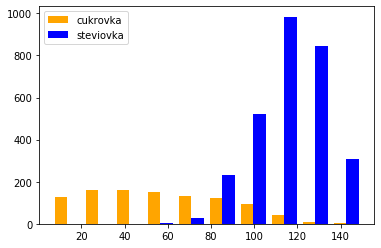

In [4]:
positive = merged_data[merged_data['class']  == 1]
negative = merged_data[merged_data['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])

V tomto grafe mozeme vidiet, ze hodnoty mean glucose nad 120 zodpovedaju pacientom, 
ktori nemaju cukrovku. A zasa hodnoty pod 80 zodpovedaju pacientom, ktori maju cukrovku. 
Preto prvy uzol pri rozhodovani bude taky, ktory bude rozdelovat data pod 80, nad 120.

Percentualne zastupenie pacientov s cukrovkou je 94.04309252217998


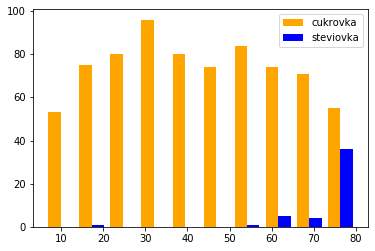

In [43]:
uzol1 = merged_data[merged_data['mean_glucose'] < 80]

positive = uzol1[uzol1['class']  == 1]
negative = uzol1[uzol1['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(uzol1['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol1['class'].count() * 100)

Pri hodnotach mean_glucose mensich ako 80, sme zistili, ze viac ako 94% pacientov maju cukrovku.
S touto percotualnou hodnotout sme spokojny, preto tento uzol dalej uz nerozsirujeme.

Percentualne zastupenie pacientov s cukrovkou je 91.66666666666666


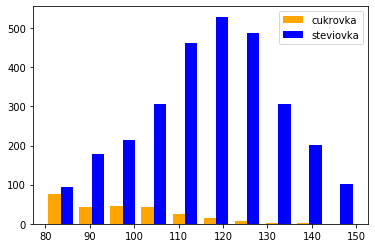

In [44]:
uzol2 = merged_data[merged_data['mean_glucose'] > 80]

positive = uzol2[uzol2['class']  == 1]
negative = uzol2[uzol2['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol2['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol2['class'].count() * 100)

Pri hodnotach nad 120 mozeme spozorovat, ze sa jedna o pacientov bez cukrovky.
Vdaka tomu ziskavame novy interval, podla ktoreho budeme znova rozdelovat.

Percentualne zastupenie pacientov bez cukrovky je 98.88535031847134


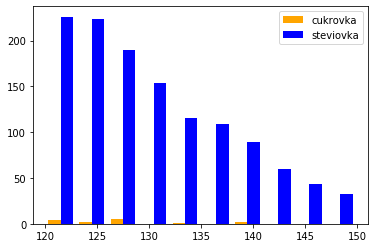

In [46]:
uzol3 = merged_data[merged_data['mean_glucose'] > 120]

positive = uzol3[uzol3['class']  == 1]
negative = uzol3[uzol3['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol3['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol3['class'].count() * 100)

Mozeme vidiet, ze percentualna presnost pre hodnoty vyssie ako 120 je takmer 99%. Co je dost dobre.

Percentualne zastupenie pacientov bez cukrovky je 86.85744568097509


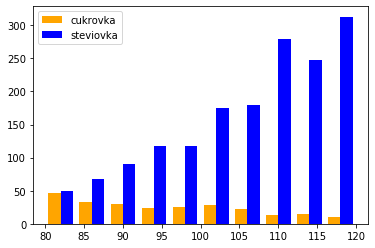

In [48]:
uzol4 = merged_data[(merged_data['mean_glucose'] < 120) & (merged_data['mean_glucose'] > 80)]

positive = uzol4[uzol4['class']  == 1]
negative = uzol4[uzol4['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol4['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol4['class'].count() * 100)

Hodnoty nad 105 vyzeraju byt dost v prospech pacientov, ktori chorobu nemaju.
Preto sa na tento interval ideme zamerat.

Percentualne zastupenie pacientov bez cukrovky je 94.82262703739214


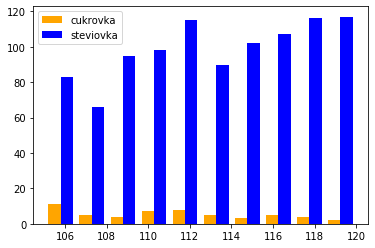

In [49]:
uzol5 = merged_data[(merged_data['mean_glucose'] < 120) & (merged_data['mean_glucose'] > 105)]

positive = uzol5[uzol5['class']  == 1]
negative = uzol5[uzol5['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol5['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol5['class'].count() * 100)

Mozeme vidiet, ze hodnoty dosiahli 94% podiel pacientov bez choroby a s pacienti s chorobou.
A dalej sa budeme zaoberat intervalu mensiemu ako 105 a vacsiemu ako 80.

Percentualne zastupenie pacientov bez cukrovky je 76.98695136417555


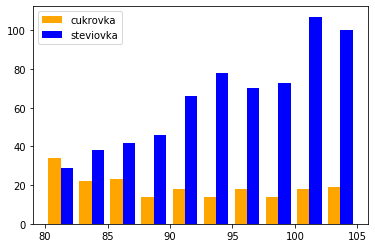

In [50]:
uzol6 = merged_data[(merged_data['mean_glucose'] < 105) & (merged_data['mean_glucose'] > 80)]

positive = uzol6[uzol6['class']  == 1]
negative = uzol6[uzol6['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol6['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol6['class'].count() * 100)

Blizsie sa pozrieme na interval od 90 po 105, nakolko pozorujeme vyraznu prevahu pacientov bez choroby
diabetes milisus

Percentualne zastupenie pacientov bez cukrovky je 82.91032148900169


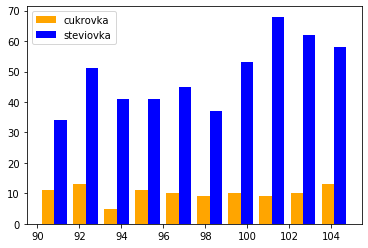

In [51]:
uzol7 = merged_data[(merged_data['mean_glucose'] < 105) & (merged_data['mean_glucose'] > 90)]

positive = uzol7[uzol7['class']  == 1]
negative = uzol7[uzol7['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol7['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol7['class'].count() * 100)

Vidime, ze pri tomto intervale uz ku vyraznejsiemu prekrivu pacientov s chorobou 
a bez choroby ako pri predoslych intervaloch, avsak pacientov bez choroby je takmer 83% a tuto hodnotu
povazujeme za dostacujucu pre oznacenie tohto intervalu v prospech pacientov bez choroby.

A ostava nam uz iba interval vacsie a rovne 80 a mensie a rovne 90. 

Percentualne zastupenie pacientov bez cukrovky je 63.095238095238095


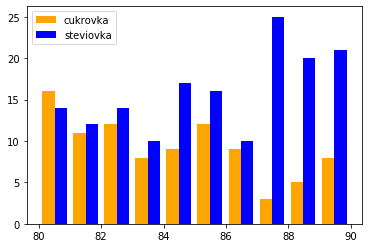

In [52]:
uzol8 = merged_data[(merged_data['mean_glucose'] <= 90) & (merged_data['mean_glucose'] >= 80)]

positive = uzol8[uzol8['class']  == 1]
negative = uzol8[uzol8['class']  == 0]

x = [positive['mean_glucose'], negative['mean_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(uzol8['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / uzol8['class'].count() * 100)

Pre interval vacsie a rovne 80 a mensie a rovne 90, neviem uz presnejsie urcit podla jedneho atributu, 
pretoze je tu 63% pacientov bez cukrovky, preto tento interval by sme bud zaklasifikoval ako pacienti 
s cukrovkou alebo pacienti pri ktorych dalej, nedokazeme rozhodnut. 

In [13]:
# Strom na urcenie ci pacient ma chorobu vyzera nasledovne
merged_data[(merged_data['mean_glucose'] <= 80)]

# Strom na urcenie ci pacient nema chorobu vyzera nasledovne
merged_data[(merged_data['mean_glucose'] >= 9)]

,name,address,sex,date_of_birth,race,marital-status,occupation,pregnant,relationship,education,...,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen,age,class
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",Male,30/3/1967,White,Never-married,Adm-clerical,f,Not_in_family,Masters,...,95.351562,41.828816,1.280503,3.351277,14.103679,47.474805,3.513019,11.305999,52.0,1.0
1,Ernest Kline,"391 Ball Road Suite 961\r\nflowersborough, IN ...",Male,15/10/1970,Black,Divorced,transport-moving,f,Not_in_family,Some-college,...,111.164062,51.802174,0.267679,-0.141940,2.902174,19.058253,8.402489,79.618941,49.0,0.0
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",Male,16/12/1954,White,Never-married,Sales,f,Not_in_family,Some-college,...,14.460938,29.387737,5.600391,34.223119,57.382107,68.262860,1.042517,0.231636,65.0,1.0
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",Male,23/7/1969,White,Married-civ-spouse,Craft-repair,f,Husband,Some-college,...,107.796875,41.562709,0.510415,1.672603,1.910535,17.340950,10.508914,120.443237,50.0,1.0
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",Male,5/3/1950,White,Married-civ-spouse,Machine-op-inspct,f,Husband,Some-college,...,111.484375,53.068350,0.459786,-0.116594,1.599498,11.347475,12.595281,226.699206,69.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Clair Pinkleton,"8582 Lee Roads\r\nCostaburgh, SC 21897",Male,18/3/1952,Asian-Pac-Islander,Married-civ-spouse,transport-moving,f,Husband,HS-grad,...,103.578125,45.166638,0.552355,0.777646,21.821070,51.177177,2.398916,4.759217,67.0,1.0
3929,William Pope,68430 Erik terrace Suite 279\r\nPort Adamborou...,female,26/5/1952,White,Never-married,Prof-specialty,f,Not_in_family,Bachelors,...,27.468750,37.283110,4.430580,20.844460,7.814381,31.365559,4.772329,24.500064,67.0,1.0
3930,Jared Kinsey,Unit 8416 Box 3801\r\nDPO AE 31166,female,7/7/1970,White,Never-married,Adm-clerical,t,Not_in_family,Some-college,...,100.859375,32.731324,0.251239,3.491732,4.968227,25.765971,5.876207,36.871068,49.0,0.0
3931,frederick Lawley,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",Male,22/7/1977,White,Married-civ-spouse,transport-moving,f,Husband,7th-8th,...,40.398438,33.748458,3.933903,19.294670,96.349498,76.576780,0.558779,-0.717264,42.0,1.0


## Komplikovany strom

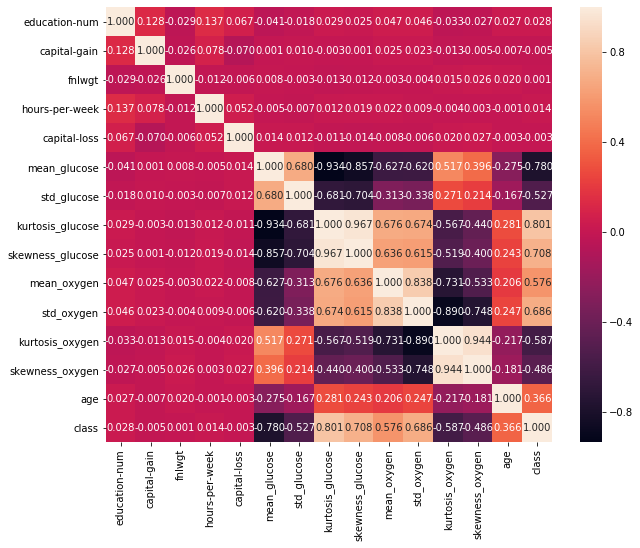

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(merged_data.corr(), ax=ax, annot=True, fmt=".3f")

Pomocou heatmapy sme vybrali stlpce, ktore maju najvacsiu korelaciu s stlpcom class
Vybrali sme kurtosis_glucose, st_oxygen, age

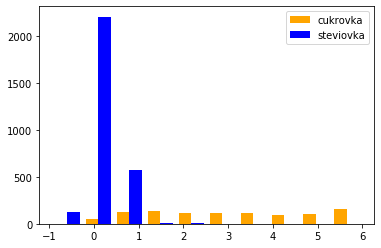

In [53]:
positive = merged_data[merged_data['class']  == 1]
negative = merged_data[merged_data['class']  == 0]

x = [positive['kurtosis_glucose'], negative['kurtosis_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])

Vdaka histograme vyberenie interval s hodnotami mensie a rovne ako 1.

Percentualne zastupenie pacientov bez cukrovky je 95.04918032786885


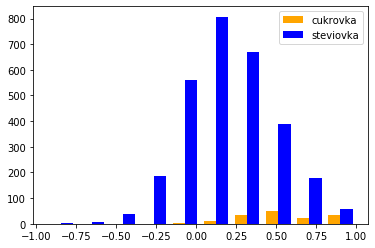

In [54]:
ct1 = merged_data[(merged_data['kurtosis_glucose'] <= 1)]

positive = ct1[ct1['class']  == 1]
negative = ct1[ct1['class']  == 0]

x = [positive['kurtosis_glucose'], negative['kurtosis_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(ct1['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct1['class'].count() * 100)

Ostrielani predoslou analyzou sme dokazali vybrat intervali len tak od oka. Vidime, ze pokial rozdelime data podla
kurtosis glucose a hranicou mensie a rovne ako 1, vieme ziskat 99.2% podiel pacientov bez a pacientov s chorobu

Percentualne zastupenie pacientov s cukrovkou je 99.79879275653923


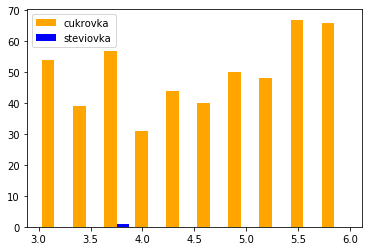

In [55]:
ct2 = merged_data[(merged_data['kurtosis_glucose'] >= 3)]

positive = ct2[ct2['class']  == 1]
negative = ct2[ct2['class']  == 0]

x = [positive['kurtosis_glucose'], negative['kurtosis_glucose']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct2['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct2['class'].count() * 100)

Taktiez pokial data rozdelime podla kurtosis glucose a interval vacsi a rovny 3, vieme ziskat 99,79%
podiel pacientov s a bez choroby.
dalej si ulozime data ulozime a budeme pokracovat s inym atributom.

Percentualne zastupenie pacientov s cukrovkou je 92.48704663212435


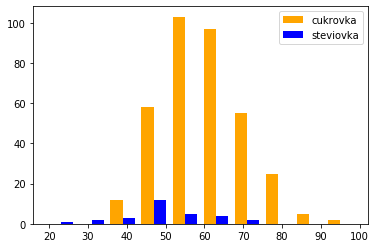

In [56]:
ct3 = merged_data[(merged_data['kurtosis_glucose'] <= 3) & (merged_data['kurtosis_glucose'] >= 1)]

positive = ct3[ct3['class']  == 1]
negative = ct3[ct3['class']  == 0]

x = [positive['age'], negative['age']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct3['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct3['class'].count() * 100)

Po vizualizacia dat pomocou ineho stlpca ako kurtosis_glucose vieme znova najst hodnoty, ktore by nam
mohli ukazat charakteristika pre rozlisenie pacientov s chorobou a bez choroby. Pouzijeme stlpec age,
pricom zoberieme interval do 35, a pre pacientov s chorobou zoberieme interval nad 80.

Percentualne zastupenie pacientov bez cukrovky je 60.0


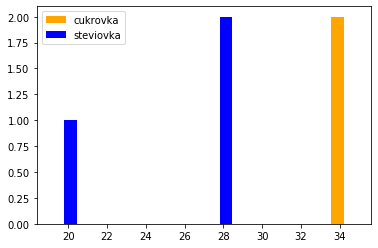

In [57]:
ct3 = merged_data[(merged_data['kurtosis_glucose'] <= 3) & (merged_data['kurtosis_glucose'] >= 1)]
ct4 = ct3[(ct3['age'] <= 35)]

positive = ct4[ct4['class']  == 1]
negative = ct4[ct4['class']  == 0]

x = [positive['age'], negative['age']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov bez cukrovky je', int(ct4['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct4['class'].count() * 100)

Identifikovali sme dalsi interval no teraz pre stlpec age, tento interval je pokial hodnota
je mensia a rovna ako 35. Vdaka tomuto intervalu vieme ziskat 97,1% podiel pacientov bez chorobou a s chorobou

Percentualne zastupenie pacientov s cukrovkou je 100.0


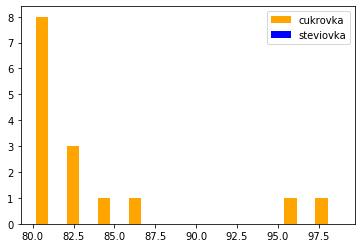

In [58]:
ct5 = ct3[(ct3['age'] >= 80)]

positive = ct5[ct5['class']  == 1]
negative = ct5[ct5['class']  == 0]

x = [positive['age'], negative['age']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct5['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct5['class'].count() * 100)

V intervale vacsie alebo rovne 80 sme zistili, ze je 100% podiel pacientov s chorobou a bez choroby.
Preto tento interval budeme zahrnat do stromu.

Percentualne zastupenie pacientov s cukrovkou je 92.89617486338798


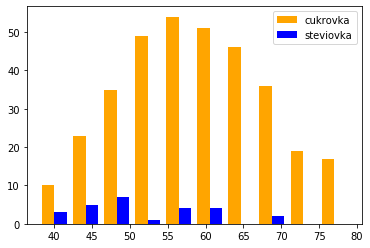

In [59]:
ct6 = ct3[(ct3['age'] < 80) & (ct3['age'] > 35)]

positive = ct6[ct6['class']  == 1]
negative = ct6[ct6['class']  == 0]

x = [positive['age'], negative['age']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct6['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct6['class'].count() * 100)

Roznorodost v intervale mensie ako 80 a zaroven vacsie ako 35 je prilis velka, preto uz nevieme pouzit
tento stlpec pre rozhodovanie a pouzijeme iny. Pouzijeme stlpec std_oxygen.

Percentualne zastupenie pacientov s cukrovkou je 92.89617486338798


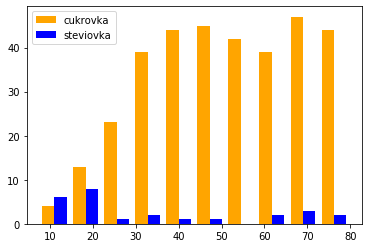

In [63]:
positive = ct6[ct6['class']  == 1]
negative = ct6[ct6['class']  == 0]

x = [positive['std_oxygen'], negative['std_oxygen']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct6['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct6['class'].count() * 100)

Pomocou grafe vieme identifikovat dalsi interval a to mensie ako 20, ktory by sa dal este pouzit pri
rozhodovani o akeho pacienta ide.

Percentualne zastupenie pacientov s cukrovkou je 61.53846153846154


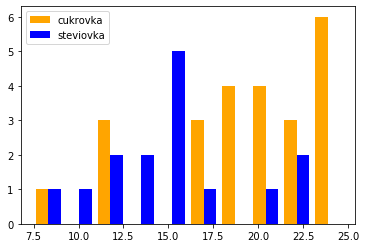

In [64]:
ct7 = ct6[(ct6['std_oxygen'] <= 25)]

positive = ct7[ct7['class']  == 1]
negative = ct7[ct7['class']  == 0]

x = [positive['std_oxygen'], negative['std_oxygen']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct7['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct7['class'].count() * 100)

Vidime, ze tento interval nam dava celkom dobru hodnotu a to 92% podiel pacienta bez choroby a pacienta s 
chorobou. Preto tento interval tiez zahrnieme do nasho stromu.

Percentualne zastupenie pacientov s cukrovkou je 96.63608562691131


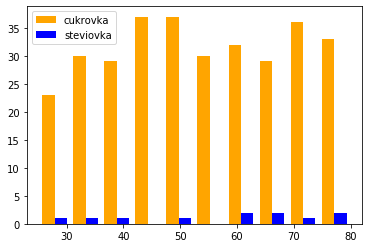

In [65]:
ct7 = ct6[(ct6['std_oxygen'] > 25)]

positive = ct7[ct7['class']  == 1]
negative = ct7[ct7['class']  == 0]

x = [positive['std_oxygen'], negative['std_oxygen']]
plt.hist(x, color=['orange', 'blue'])
plt.legend(['cukrovka', 'steviovka'])
print('Percentualne zastupenie pacientov s cukrovkou je', int(ct7['class'].value_counts().__str__().split('\n')[0].split(' ')[-1]) / ct7['class'].count() * 100)

Dalsie hodnoty su uz nejasne nevieme na viac ako 70% identifikovat intervaly ktore by davali lepsie vysledky
preto nas rozhodovaci strom uz nebudeme dalej rozsirovat a tieto data by sme specifikovali ako
nevieme urcite.

Pre ostatne intervaly vieme urcit len s velmi malou pravdepodobnostou ci pacient ma alebo 
nema chorobu

In [25]:
val_merged_data = pd.read_csv('validate_datas.csv',index_col=0)
val_merged_data = val_merged_data.dropna()
val_merged_data['class_predict'] = np.NaN

Rozhodovaci strom pre jeden parameter 'mean_glucose' sme vytvorili pomocou funkcie apply a lambda funkcie. Pricom sme interval tychto hodnot rozdelili na hodnote 85. Pacientov s hodnotu mensou ako 85 sme zadelili ako tych, ktori maju chorobu a nad 85 ako tych, ktori chorobu nemaju.

In [26]:
val_merged_data['class_predict'] = val_merged_data['mean_glucose'].apply(lambda x : 1 if x < 85 else 0)

Nas rozhodovaci strom zalozeni na jednom parametri dosiahol precision 90.3%, recall 89.5% a accuracy 92.2%.

In [27]:
print(classification_report(val_merged_data['class'],val_merged_data['class_predict'], digits=3))

              precision    recall  f1-score   support

         0.0      0.942     0.952     0.947       963
         1.0      0.863     0.838     0.850       346

    accuracy                          0.922      1309
   macro avg      0.903     0.895     0.899      1309
weighted avg      0.921     0.922     0.922      1309



V nasledujucej bunke mame napisane rozmedzia 3 hodnot, podla ktorych vytvarame strom - zakomentovana cast kodu.

A taktiez si nacitavame validacne data zo suboru - tieto data uz presli preprocessingom v (notebooku finalne riesenie vyprodukuje csv s nazvom 'validate_datas.csv'), odstranujeme nulove hodnoty, nakolko sme zistili, ze dva riadky obsahuju prazdnu hodnotu pre 'class' a pridavame novy stlpec, do ktoreho si budeme odkladat predikovanu hodnotu. 

In [28]:
# # Strom pre urcenie ci pacient nema chorobu je nasledovny
# merged_data[(merged_data['std_oxygen'] <= 25)]
# merged_data[(merged_data['age'] <= 35 )]
# merged_data[(merged_data['kurtosis_glucose'] <= 1)]
# # Strom pre urcenie ci pacient ma chorobu je nasledovny
# merged_data[(merged_data['age'] >= 80 )]
# merged_data[(merged_data['kurtosis_glucose'] >= 3)]

val_merged_data = pd.read_csv('validate_datas.csv',index_col=0)
val_merged_data = val_merged_data.dropna()
val_merged_data['class_predict'] = 1

Tato bunka obsahuje nas rozhodovaci strom pre urcenie, ci pacient ma alebo nema chorobu. Tieto hranice sme zistili pomocou predoslej analyzy vyssie.

Nami vytvoreny strom zalozeny na troch parametroch dosiahol precision 96.2%, recall 92% a accuracy 95.4%.

In [29]:
mask1 = (val_merged_data['kurtosis_glucose'] <= 1)
val_merged_data.loc[mask1 ,'class_predict'] = 0
mask2 = (val_merged_data['kurtosis_glucose'] > 1) & (val_merged_data['age'] <= 35 )
val_merged_data.loc[mask2 ,'class_predict'] = 0
mask3 = (val_merged_data['std_oxygen'] <= 25) & (val_merged_data['kurtosis_glucose'] > 1) & (val_merged_data['age'] > 35 )
val_merged_data.loc[mask3 ,'class_predict'] = 0

print(classification_report(val_merged_data['class'],val_merged_data['class_predict'], digits=3))

              precision    recall  f1-score   support

         0.0      0.947     0.993     0.970       963
         1.0      0.977     0.847     0.907       346

    accuracy                          0.954      1309
   macro avg      0.962     0.920     0.938      1309
weighted avg      0.955     0.954     0.953      1309

